In [1]:
import scanpy as sc #for scanpy >= 1.3.7
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white')

import seaborn as sns

scanpy==1.5.1 anndata==0.7.3 umap==0.4.4 numpy==1.18.1 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.1 statsmodels==0.11.1 python-igraph==0.8.2 leidenalg==0.8.0


In [5]:
#path = "/home/burt/Documents/projects/2020/tcell_scRNAseq/output/"
path = "C:/Users/Philipp/OneDrive/projects/2020/tcell_scRNAseq/output/"
df_xin = pd.read_csv(path+"variance_xin_2018.csv")
df_xin_s = pd.read_csv(path+ "variance_xin_2018_seurat.csv")

df_ciucci = pd.read_csv(path+"variance_ciucci_2019.csv")
df_ciucci_s = pd.read_csv(path+"variance_ciucci_2019_seurat.csv")

df_magen = pd.read_csv(path+"variance_magen_2019.csv")
df_magen_s = pd.read_csv(path+"variance_magen_2019_seurat.csv")

studies = ["xin2018", "ciucci2019", "magen2019"]
df_sc = [df_xin, df_ciucci, df_magen]
df_seu = [df_xin_s, df_ciucci_s, df_magen_s]

for df, study in zip(df_sc, studies):
    df["study"] = study
    df["norm."] = "scanpy"

for df, study in zip(df_seu, studies):
    df["study"] = study
    df["norm."] = "sctransform"

    
df = pd.concat(df_sc)
df_seu = pd.concat(df_seu)

In [6]:
df_seu

,Unnamed: 0,sct.detection_rate,sct.gmean,sct.variance,sct.residual_mean,sct.residual_variance,sct.variable,study,norm.
0,Mrpl15,0.200000,0.162840,0.242355,-0.010348,0.883321,False,xin2018,sctransform
1,Lypla1,0.219355,0.179840,0.280671,-0.007149,0.907176,False,xin2018,sctransform
2,Tcea1,0.243548,0.200601,0.279043,0.003566,0.955879,False,xin2018,sctransform
3,Atp6v1h,0.135484,0.103501,0.148051,-0.004107,0.925525,False,xin2018,sctransform
4,Rb1cc1,0.127419,0.095708,0.136703,0.002919,0.949153,False,xin2018,sctransform
...,...,...,...,...,...,...,...,...,...
11788,Csprs,0.011246,0.008377,0.015143,0.021278,1.541996,True,magen2019,sctransform
11789,AC168977.1,0.009897,0.006883,0.009803,0.006676,1.064771,False,magen2019,sctransform
11790,PISD,0.239766,0.205160,0.367240,0.044872,1.372484,True,magen2019,sctransform
11791,DHRSX,0.298246,0.264878,0.401812,-0.001056,0.945977,False,magen2019,sctransform


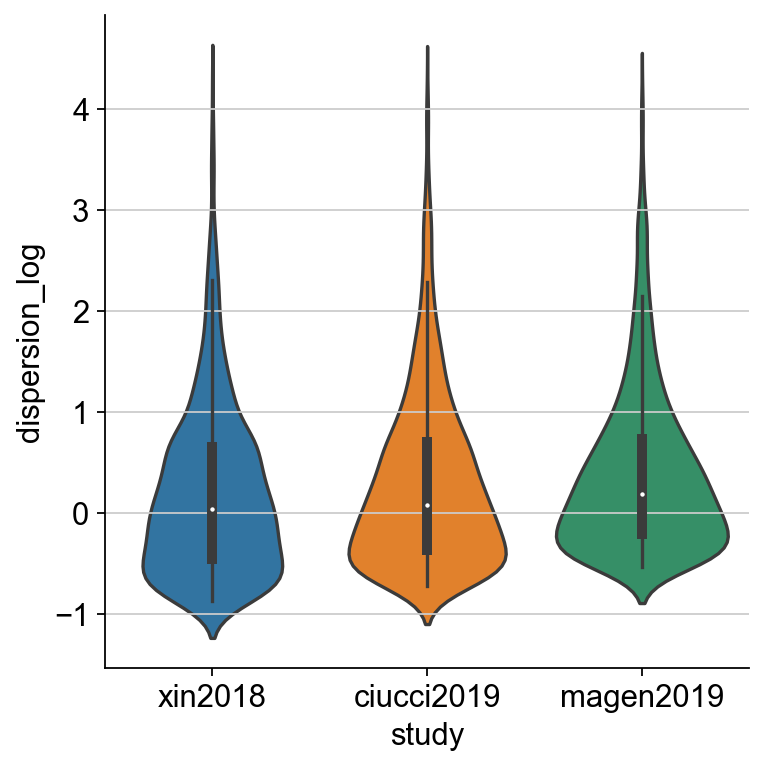

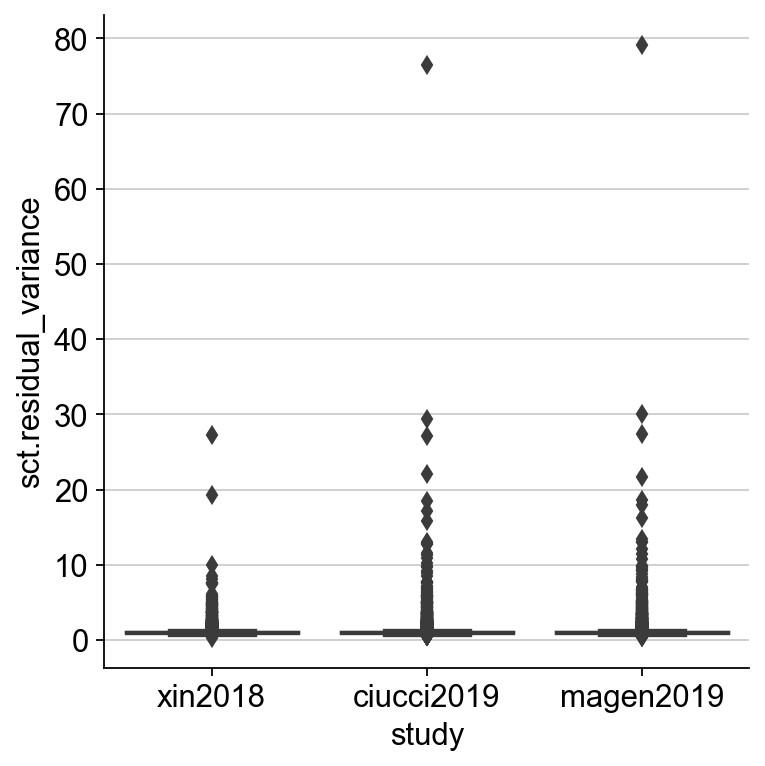

In [11]:
df2 = df[df.highly_variable == True]
df2 = df2[df2.variable == "dispersions_norm"]
df2["dispersion_log"] = np.log2(df2.value)
g = sns.catplot(data = df2, x = "study", y = "dispersion_log", kind = "violin")

g = sns.catplot(data = df_seu, x = "study", y = "sct.residual_variance", kind = "violin")

# clip outliers!
